# S-Curve motion (3rd order motion) calculation

###### S-Curve calculation for stepper motors
This paper shows a way to calculate the complete S-Curve motion without any iteration.

S-Curve motion means that, given the speed, acceleration and hyper-acceleration (called jerk), given a starting and a ending point, the calculation results give a smooth motion: at any time the jerk is maintained under a given maximum. Also, the calculation gives the minimum travel time.

During the travel, a S-Curve motion can take up to 7 phases. Depending of the parameters, the phases may be lowered until 4.



In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import math
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML 
#size of plot
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['figure.dpi']=150

# Intro
In the remaining part of the document, **the half** of the complete travel is addressed. The other half is exactly the same movement but with jerk inverted.

Assume the system can sustain a maximum jerk of $j_{max}$, the motor can have a maximal acceleration of $a_{max}$ and a maximum velocity of $v_{max}$. We suppose also that $x_{start}<x_{end}$. Let define also $x_{end/2}$ the half of the travel requested. 

There are several motion phases in this half travel movement:

The first phase **PH1** is the acceleration motion, from rest, the acceleration raise from $0$ (at $t=0$) to $a_{max}$ at $t=t_0$, during this phase we have $j(t)=j_{max}$.

The second phase **PH2** is the motion at maximum acceleration, during this phase we have $j(t)=0$, the end of this phase is noted $t_1$.

The third phase **PH3** is the deceleration motion, during this phase we have $j(t)=-j_{max}$, the end of this phase is noted $t_2$.

The fourth phase **PH4** is the one at constant speed $v(t)=v_{max}$ ($a(t)=0$) until we reach $x_{end/2}$.

This is summarized in the following figure that represents the motion velocity:

In [7]:
Image(url= "IM1.jpg")

# Calculations
The calculation must be aware that in some cases, the maximum velocity can't be reached. In the figure above, $x_{end}-x_{start}$ can be so small that **PH4** collapse completly. In this case, a new lower $v_{max}$ is calculated in order to make $x_{t2}$ the mid trvel point ($x_{end/2}$).

Also it is possible that **PH2** collapse completly if the parameters are such that $a_{max}$ cannot be reached before $v_{max}$ is reached. In this case, a new lower $a_{max}$ is calculated in order to have $v_{max}$ at $x_{t0}$.

Finally, it's possible that $a_{max}$ and can't be reached. In this case a new $a_{max}$ is calculated in order to complete the half travel without **PH2**.

This is described here after.

# 1. $x_{end}-x_{start}$ big enough to have complete travel at $v_{max}$
Here we have all the phases


**For PH1** the movement equations are:
$$
\begin{aligned}
j(t) & = j_{max} \\
a(t) & = j_{max}.t \\
v(t) & = \dfrac{j_{max}.t^2}{2}\\
x(t) & = \dfrac{j_{max}.t^3}{6}+x_{start}\\
\end{aligned}
$$
**For PH2**, the change is when $a=a_{max}$ then at $t=t_0=\dfrac{a_{max}}{j_{max}}$, we have:
$$
\begin{aligned}
v_{t0} & = \dfrac{j_{max}.t_0^2}{2}\\
x_{t0} & = \dfrac{j_{max}.t_0^3}{6}+x_{start}
\end{aligned}
$$
we note $t'=t-t_0$, the movement equations are:
$$
\begin{aligned}
j(t') & = 0 \\
a(t') & = a_{max} \\
v(t') & = a_{max}.t'+v_{t0}\\
x(t') & = \dfrac{a_{max}.t'^2}{2}+v_{t0}.t'+x_{t0}\\
\end{aligned}
$$

**For PH3**, let $t=t_1$, the change is when $v(t_1)=v_{max}-v_{t0}$ by symmetry. Hence $v_{t1}=v_{max}-\dfrac{a_{max}^2}{2.j_{max}}$. At that time, we have also $v_{t1}=v_{t0}+a_{max}.(t_1-t_0)$, then we can calculate $t_1$, we have $t_1=\dfrac{v_{max}}{a_{max}}$. At that point we also calculate $x(t_1)$, we have finally:
$$
\begin{aligned}
v_{t1} & = a_{max}.(t_1-t_0)+v_{t0}\\
x_{t1} & = \dfrac{a_{max}.(t_1-t_0)^2}{2}+v_{t0}.(t_1-t_0)+x_{t0}\\
\end{aligned}
$$
we note $t''=t-t_1$, the movement equations are:
$$
\begin{aligned}
j(t'') & = -j_{max} \\
a(t'') & = -j_{max}.t''+a_{max} \\
v(t'') & = \dfrac{-j_{max}.t''^2}{2}+a_{max}.t''+v_{t1}\\
x(t'') & = \dfrac{-j_{max}.t''^3}{6}+\dfrac{a_{max}.t''^2}{2}+v_{t1}.t''+x_{t1}\\
\end{aligned}
$$
**For PH4**, assume the change is at $t=t_2$, we have $t_2-t_1=t_0$ by symmetry. Hence $t_2=\dfrac{a_{max}}{j_{max}}+\dfrac{v_{max}}{a_{max}}$. At $t=t_2$ we have $v(t_2)=v_{max}$, we can calculate $x(t_2)=x_{t2}$:
$$
\begin{aligned}
v_{t2} & = v_{max}\\
x_{t2} & = \dfrac{-j_{max}.t_0^3}{6}+\dfrac{a_{max}.t_0^2}{2}+v_{t1}.t_0+x_{t1}\\
\end{aligned}
$$
we note $t'''=t-t_2$, the movement equations are:
$$
\begin{aligned}
j(t''') & = 0 \\
a(t''') & = 0 \\
v(t''') & = v_{max}\\
x(t''') & = v_{max}.t'''+x_{t2}\\
\end{aligned}
$$

# 2. $x_{end}-x_{start}$ not big enough reach $v_{max}$ during the (half) travel
It remains the first three phases and we have to lower $v_{max}$ in order to have $x_{t2}=x_{end/2}$. Let's develop $x_{t2}$:
$$
\begin{aligned}
x_{t2} & = \dfrac{-j_{max}.t_0^3}{6}+\dfrac{a_{max}.t_0^2}{2}+v_{t1}.t_0+x_{t1}\\
& = \dfrac{-j_{max}.t_0^3}{6}+\dfrac{a_{max}.t_0^2}{2}+(a_{max}.(t_1-t_0)+v_{t0}).t_0+\dfrac{a_{max}.(t_1-t_0)^2}{2}+v_{t0}.(t_1-t_0)+x_{t0}\\
& = \dfrac{-j_{max}.t_0^3}{6}+\dfrac{a_{max}.t_0^2}{2}+a_{max}.t_1.t_0-a_{max}.t_0^2+v_{t0}.t_0+\dfrac{a_{max}.t_1^2}{2}-a_{max}.t_1.t_0+\dfrac{a_{max}.t_0^2}{2}+v_{t0}.t_1-v_{t0}.t_0+x_{t0}\\
& = \dfrac{-j_{max}.t_0^3}{6}+\dfrac{a_{max}.t_1^2}{2}+v_{t0}.t_1+x_{t0}\\
& = \dfrac{-j_{max}.t_0^3}{6}+\dfrac{a_{max}.t_1^2}{2}+(\dfrac{j_{max}.t_0^2}{2}).t_1+\dfrac{j_{max}.t_0^3}{6}+x_{start}\\
& = \dfrac{a_{max}.t_1^2}{2}+\dfrac{j_{max}.t_0^2.t_1}{2}+x_{start}\\
& = \dfrac{a_{max}.(\dfrac{v_{max}}{a_{max}})^2}{2}+\dfrac{j_{max}.(\dfrac{a_{max}}{j_{max}})^2.\dfrac{v_{max}}{a_{max}}}{2}+x_{start}\\
& = \dfrac{v_{max}^2}{2.a_{max}}+\dfrac{a_{max}.v_{max}}{2.j_{max}}+x_{start}\\
\end{aligned}
$$

The purpose is to find $v_{max}$, function of the (half) travel $x_{end/2}$. The equation on $v_{max}$ to solve is

$$
\begin{aligned}
j_{max}.v_{max}^2+a_{max}^2.v_{max}+2.a_{max}.j_{max}.(x_{start}-x_{end/2})=0
\end{aligned}
$$

It's a second order equation, let's calculate the roots:
$$
\begin{aligned}
v_{max} & = \frac{-a_{max}^2 \pm \sqrt{ a_{max}^4 + 8.a_{max}.j_{max}^2.(x_{end/2}-x_{start})}}{2.j_{max}}\\
& = \frac{-a_{max}^2 \pm \sqrt{ a_{max}^4.(1 + \frac{8.j_{max}^2}{a_{max}^3}.(x_{end/2}-x_{start}))}}{2.j_{max}}\\
& = \frac{a_{max}^2}{2.j_{max}}.(\mp \sqrt{ (1 + \frac{8.j_{max}^2}{a_{max}^3}.(x_{end/2}-x_{start}))}-1)\\
\end{aligned}
$$
In this equation, if $x_{end/2}\ge x_{start}$ then $a_{max}\ge 0$, hence the root is always positive and $\ge1$. From the hypothesis in building the equation, $v_{max}$ must be $\ge 0$, hence the final result is
$$
\begin{aligned}
v_{max} = \frac{a_{max}^2}{2.j_{max}}.(\sqrt{ (1 + \frac{8.j_{max}^2}{a_{max}^3}.(x_{end/2}-x_{start}))}-1)\\
\end{aligned}
$$

# 3. $t1\le t0$ (can't reach $a_{max}$)
From the calculations, we have $t_0=\dfrac{a_{max}}{j_{max}}$ and $t_1=\dfrac{v_{max}}{a_{max}}$. Then to have at least $t1=t0$ we need to find a new lower $a_{max}$, we have:

$$
\begin{aligned}
a_{max}^2 & = v_{max}.j_{max}\\
\end{aligned}
$$

hence ($a_{max}>0$)

$$
\begin{aligned}
a_{max} & = \sqrt{v_{max}.j_{max}}\\
\end{aligned}
$$


Let's calculate all this in python:

vMprocess = 0.1372
jM = 30.0000
aM = 2.0290
vM = 0.1372
t0 = 0.0676
t1 = 0.0676
t2 = 0.1353
v_t0 = 0.0686
x_t0 = 0.0015
v_t1 = 0.0686
x_t1 = 0.0015
v_t2 = 0.1372
x_t2 = 0.0093
t_xend2 = 0.1405


Text(0.5, 1.0, 'j(t)')

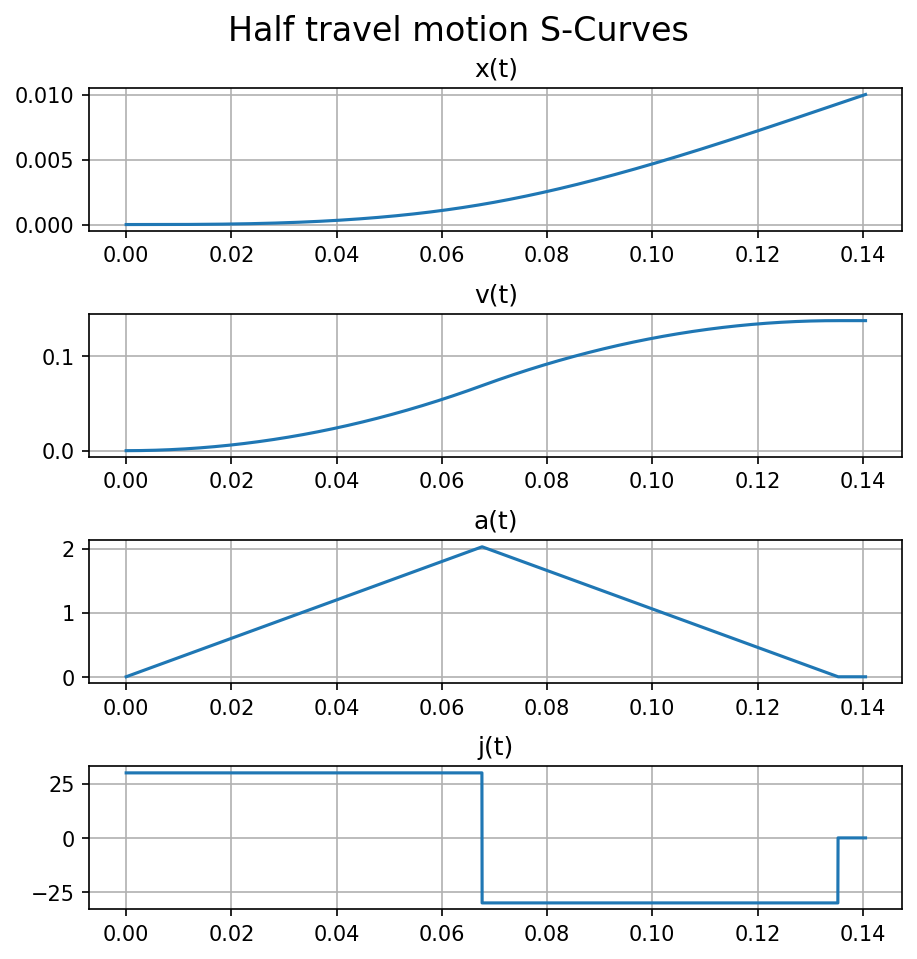

In [9]:
########################################################
# Edit this:
########################################################
############## system/motor parameters (absolute values)  ################
jM = 30     # m/s^3
aM = 3     # m/s^2
vM = 1  # m/s

startX = 0
endX2 = 0.01

########################################################
############### Calculations
########################################################
# 1. One time calculations
t0 = aM / jM
t1 = vM / aM
# If t1<t0, then we have to lower aM in order to have at least t1=t0
if t1 < t0:
    aM = math.sqrt( vM*jM )
    #recalculate t0/t1
    t0 = aM / jM
    t1 = vM / aM

t2 = t0 + t1

vt0 = jM*t0*t0/2
xt0 = jM*t0*t0*t0/6 + startX

vt1 = aM*(t1-t0) + vt0
xt1 = aM*(t1-t0)*(t1-t0)/2 + vt0*(t1-t0) + xt0

vt2 = vM
xt2 = -jM*t0*t0*t0/6 + aM*t0*t0/2 + vt1*t0 + xt1

#################
# Let's detect if half travel (endX2) is >= xt2
if endX2 >= xt2:
    # Yes, let's calculate endtime via x(t) = vM*(t-t2) + xt2
    endtime = t2 + (endX2-xt2) / vM
else:
    # No, let's calculate new vM:
    vM = aM*aM/2/jM*(math.sqrt(1+8*jM*jM/(aM*aM*aM)*(endX2-startX))-1)
    print("vMprocess = {:.4f}".format( vM ))
    # and recalculate the affected variables
    t0 = aM / jM
    t1 = vM / aM
    # If t1<t0, then we have to lower aM in order to have at least t1=t0
    if t1 < t0:
        aM = math.sqrt( vM*jM )
        #recalculate t0/t1
        t0 = aM / jM
        t1 = vM / aM    

    t2 = t0 + t1
    
    vt0 = jM*t0*t0/2
    xt0 = jM*t0*t0*t0/6 + startX

    vt1 = aM*(t1-t0) + vt0
    xt1 = aM*(t1-t0)*(t1-t0)/2 + vt0*(t1-t0) + xt0

    vt2 = vM
    xt2 = -jM*t0*t0*t0/6 + aM*t0*t0/2 + vt1*t0 + xt1
    
    endtime = t2 + (endX2-xt2) / vM
    
print("jM = {:.4f}".format( jM )) 
print("aM = {:.4f}".format( aM ))    
print("vM = {:.4f}".format( vM ))
print("t0 = {:.4f}".format( t0 )) 
print("t1 = {:.4f}".format( t1 ))    
print("t2 = {:.4f}".format( t2 ))

print("v_t0 = {:.4f}".format( vt0 )) 
print("x_t0 = {:.4f}".format( xt0 ))
print("v_t1 = {:.4f}".format( vt1 )) 
print("x_t1 = {:.4f}".format( xt1 ))
print("v_t2 = {:.4f}".format( vt2 )) 
print("x_t2 = {:.4f}".format( xt2 ))
print("t_xend2 = {:.4f}".format( endtime ))

# 2. Recurrent calculations
t = 0
dt = 0.00002   #in second, discrete time tick unit, stepping simulator
# Vectors for display
xx=[]
vv=[]
aa=[]
jj=[]
time=[]

#Curves
while(t < endtime):
    t = t + dt
    time.append(t)
    
    if t<t0:
        jj.append(jM)
        aa.append(jM*t)
        vv.append(jM*t*t/2)     
        xx.append(jM*t*t*t/6+startX)
    elif t<t1:
        jj.append(0)
        aa.append(aM)
        vv.append(aM*(t-t0) + vt0)     
        xx.append(aM*(t-t0)*(t-t0)/2 + vt0*(t-t0)+xt0) 
    elif t<t2:
        jj.append(-jM)
        aa.append(-jM*(t-t1) + aM)
        vv.append(-jM*(t-t1)*(t-t1)/2 + aM*(t-t1) + vt1)     
        xx.append(-jM*(t-t1)*(t-t1)*(t-t1)/6 + aM*(t-t1)*(t-t1)/2 + vt1*(t-t1) + xt1)
    else:
        jj.append(0)
        aa.append(0)
        vv.append(vM)     
        xx.append(vM*(t-t2) + xt2)        
        
fig = plt.figure(constrained_layout=True)
fig.suptitle('Half travel motion S-Curves', fontsize=16, y=1.04)
gs = fig.add_gridspec(4, 1)

f_ax1 = fig.add_subplot(gs[0, 0])
f_ax2 = fig.add_subplot(gs[1, 0])
f_ax3 = fig.add_subplot(gs[2, 0])
f_ax4 = fig.add_subplot(gs[3, 0])

f_ax1.grid(True)
f_ax1.plot(time, xx)
f_ax1.set_title('x(t)')

f_ax2.grid(True)
f_ax2.plot(time, vv)
f_ax2.set_title('v(t)')

f_ax3.grid(True)
f_ax3.plot(time, aa)
f_ax3.set_title('a(t)') 

f_ax4.grid(True)
f_ax4.plot(time, jj)
f_ax4.set_title('j(t)') 